In [1]:
from routines import sdss_utils
import matplotlib.pyplot as plt
import torch
from torch import nn 
import matplotlib.pyplot as plt
from datetime import datetime
import os

In [2]:
### Obtain SDSS data
#data = sdss_utils.loadSdssSpecSample()
data = sdss_utils.loadSdssSpecSampleExtra()
print(type(data))
#data.columns.names

<class 'numpy.ndarray'>


In [174]:
### Create a custom dataset class to handle inputting batches into PyTorch 
class CustomDataset():
    def __init__(self, labels, data, transform=None, target_transform=None):
        self.img_labels = labels
        self.img_data = data
        self.transform = transform
        self.target_transform = target_transform

    def __len__(self):
        return len(self.img_labels)

    def __getitem__(self, idx):
        label = self.img_labels[idx]
        image = self.img_data[idx]
        if self.transform:
            image = self.transform(image)
        if self.target_transform:
            label = self.target_transform(label)
        return image, label


MLPRegressor for Photometric Redshifts

In [417]:
def get_data_z(data,zrange):
    z = data['z']
    #print(zrange)
    mask = (z>zrange[0]) & (z<zrange[1]) 
    data = data[mask]
    z = data['z']
    mu = data['petroMag_u'] - data['extinction_u']
    mg = data['petroMag_g'] - data['extinction_g']
    mr = data['petroMag_r'] - data['extinction_r']
    mi = data['petroMag_i'] - data['extinction_i']
    mz = data['petroMag_z'] - data['extinction_z']
    u_err = data['petroMagErr_u']
    g_err = data['petroMagErr_g']
    r_err = data['petroMagErr_r']
    i_err = data['petroMagErr_i']
    z_err = data['petroMagErr_z']
    return mu,mg,mr,mi,mz,u_err,g_err,r_err,i_err,z_err,z

def do_err_lim(mu,mg,mr,mi,mz,u_err,g_err,r_err,i_err,z_err,z):
    err_lim = 0.5
    err_mask = (u_err < err_lim) & (g_err < err_lim) & (r_err < err_lim) & (i_err < err_lim) & (z_err < err_lim)
    mu = mu[err_mask]
    mg = mg[err_mask]
    mr = mr[err_mask]
    mi = mi[err_mask]
    mz = mz[err_mask]
    u_err = u_err[err_mask]
    g_err = g_err[err_mask]
    r_err = r_err[err_mask]
    i_err = i_err[err_mask]
    z_err = z_err[err_mask]
    ug = mu - mg
    gr = mg - mr
    ri = mr - mi
    iz = mi - mz
    z = z[err_mask]
    print(np.shape(z))
    return mu,mg,mr,mi,mz,ug,gr,ri,iz,u_err,g_err,r_err,i_err,z_err,z
num1 = 150
def append_all(mu1,mg1,mr1,mi1,mz1,ug1,gr1,ri1,iz1,u_err1,g_err1,r_err1,i_err1,z_err1,z1,mu,mg,mr,mi,mz,ug,gr,ri,iz,u_err,g_err,r_err,i_err,z_err,z):
    mu = np.append(mu, mu1[0:num1])
    mg = np.append(mg, mg1[0:num1])
    mr = np.append(mr, mr1[0:num1])
    mi = np.append(mi, mi1[0:num1])
    mz = np.append(mz, mz1[0:num1])
    ug = np.append(ug, ug1[0:num1])
    gr = np.append(gr, gr1[0:num1])
    ri = np.append(ri, ri1[0:num1])
    iz = np.append(iz, iz1[0:num1])
    u_err = np.append(u_err, u_err1[0:num1])
    g_err = np.append(g_err, g_err1[0:num1])
    r_err = np.append(r_err, r_err1[0:num1])
    i_err = np.append(i_err, i_err1[0:num1])
    z_err = np.append(z_err, z_err1[0:num1])
    z = np.append(z, z1[0:num1])
    return mu,mg,mr,mi,mz,ug,gr,ri,iz,u_err,g_err,r_err,i_err,z_err,z
mask = np.invert(data['mask_exp'])
#mask = data['mask_exp']
data_spiral = data[mask]
#data_spiral = data
mu,mg,mr,mi,mz,u_err,g_err,r_err,i_err,z_err,z = get_data_z(data_spiral,[0.016,0.017])
mu,mg,mr,mi,mz,ug,gr,ri,iz,u_err,g_err,r_err,i_err,z_err,z = do_err_lim(mu,mg,mr,mi,mz,u_err,g_err,r_err,i_err,z_err,z)
mu = mu[0:num1]
mg = mg[0:num1]
mr = mr[0:num1]
mi = mi[0:num1]
mz = mz[0:num1]
ug = ug[0:num1]
gr = gr[0:num1]
ri = ri[0:num1]
iz = iz[0:num1]
u_err = u_err[0:num1]
g_err = g_err[0:num1]
r_err = r_err[0:num1]
i_err = i_err[0:num1]
z_err = z_err[0:num1]
z = z[0:num1]

def do_all(data_spiral,zlim,mu,mg,mr,mi,mz,ug,gr,ri,iz,u_err,g_err,r_err,i_err,z_err,z):
    mu1,mg1,mr1,mi1,mz1,u_err1,g_err1,r_err1,i_err1,z_err1,z1 = get_data_z(data_spiral,zlim)
    mu1,mg1,mr1,mi1,mz1,ug1,gr1,ri1,iz1,u_err1,g_err1,r_err1,i_err1,z_err1,z1 = do_err_lim(mu1,mg1,mr1,mi1,mz1,u_err1,g_err1,r_err1,i_err1,z_err1,z1)
    mu,mg,mr,mi,mz,ug,gr,ri,iz,u_err,g_err,r_err,i_err,z_err,z = append_all(mu1,mg1,mr1,mi1,mz1,ug1,gr1,ri1,iz1,u_err1,g_err1,r_err1,i_err1,z_err1,z1,mu,mg,mr,mi,mz,ug,gr,ri,iz,u_err,g_err,r_err,i_err,z_err,z)
    return mu,mg,mr,mi,mz,ug,gr,ri,iz,u_err,g_err,r_err,i_err,z_err,z
sep = 0.001
all_z = np.arange(0.017, 0.254, sep)
for i in range(len(all_z)):
    mu,mg,mr,mi,mz,ug,gr,ri,iz,u_err,g_err,r_err,i_err,z_err,z = do_all(data_spiral,[all_z[i],all_z[i]+sep],mu,mg,mr,mi,mz,ug,gr,ri,iz,u_err,g_err,r_err,i_err,z_err,z)
    
arr = [mu,mg,mr,mi,mz,ug,gr,ri,iz,u_err,g_err,r_err,i_err,z_err]
photo = np.stack(arr,axis=1)

print('photo: ',np.shape(photo))
print('photo: ',np.shape(photo[:,0:5]))
print('redshift: ',np.shape(z))

(168,)
(217,)
(251,)
(268,)
(382,)
(518,)
(628,)
(735,)
(676,)
(648,)
(651,)
(799,)
(852,)
(835,)
(955,)
(1012,)
(1003,)
(1053,)
(1067,)
(969,)
(944,)
(1040,)
(965,)
(955,)
(1000,)
(1091,)
(1185,)
(1199,)
(1315,)
(1472,)
(1493,)
(1331,)
(1221,)
(1236,)
(1519,)
(1616,)
(1611,)
(1670,)
(1694,)
(1557,)
(1415,)
(1408,)
(1490,)
(1711,)
(1907,)
(2024,)
(2113,)
(2362,)
(2258,)
(2296,)
(2249,)
(2315,)
(2279,)
(2368,)
(2593,)
(2923,)
(2818,)
(3016,)
(3042,)
(3025,)
(3134,)
(3077,)
(3175,)
(3037,)
(3274,)
(3294,)
(3263,)
(3164,)
(3227,)
(2994,)
(2909,)
(2933,)
(2757,)
(2602,)
(2448,)
(2437,)
(2509,)
(2562,)
(2701,)
(2569,)
(2619,)
(2474,)
(2328,)
(2542,)
(2474,)
(2511,)
(2669,)
(2652,)
(2719,)
(2529,)
(2805,)
(2651,)
(2710,)
(2575,)
(2824,)
(2820,)
(3040,)
(3082,)
(3038,)
(3151,)
(3006,)
(2955,)
(2796,)
(2825,)
(2610,)
(2591,)
(2513,)
(2735,)
(2526,)
(2677,)
(2831,)
(2680,)
(2626,)
(2625,)
(2642,)
(2784,)
(2858,)
(2810,)
(2886,)
(2892,)
(2663,)
(2585,)
(2460,)
(2374,)
(2351,)
(2391,)
(2263,)
(21

Using device: cpu
Epoch: 0 | Train loss: 0.01362254936248064 | Test loss: 0.012210129760205746
Epoch: 10 | Train loss: 0.00216923700645566 | Test loss: 0.0021597868762910366
Epoch: 20 | Train loss: 0.001371445832774043 | Test loss: 0.0014996427344158292
Epoch: 30 | Train loss: 0.001293976791203022 | Test loss: 0.0011970880441367626
Epoch: 40 | Train loss: 0.0009974451968446374 | Test loss: 0.001048697275109589
Epoch: 50 | Train loss: 0.0010518832132220268 | Test loss: 0.001068277284502983
Epoch: 60 | Train loss: 0.0009307045838795602 | Test loss: 0.0010114776669070125
Epoch: 70 | Train loss: 0.0009274828480556607 | Test loss: 0.0009291138267144561
Epoch: 80 | Train loss: 0.0009911941597238183 | Test loss: 0.0009243774111382663
Epoch: 90 | Train loss: 0.0007610718603245914 | Test loss: 0.000938075128942728
Epoch: 100 | Train loss: 0.0008480053511448205 | Test loss: 0.000858015613630414
Epoch: 110 | Train loss: 0.0008533021318726242 | Test loss: 0.0009337973315268755
Epoch: 120 | Train l

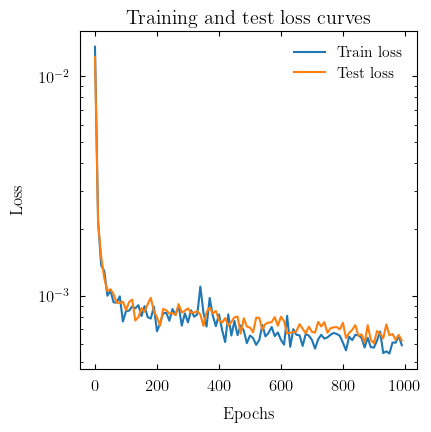

0:04:41.160566


In [418]:
### Pytorch MLPregressor! 
now = datetime.now()

# Check PyTorch version
torch.__version__

### Set the manual seed for reproducibility 
torch.manual_seed(42)

### Load in data and labels into PyTorch tensors
p_num = 14
X = torch.from_numpy(photo[:,0:p_num].copy())
y = torch.tensor(list(z))
y = y.unsqueeze(1)
full_dataset = CustomDataset(y,X)

### Split data into training and test sets 
train_size = int(0.8 * len(full_dataset))
test_size = len(full_dataset) - train_size
trainset, testset = torch.utils.data.random_split(full_dataset, [train_size, test_size])

### Split data into training and testing sets
#train_split = int(0.8 * len(X)) #80-20 train-test split
#X_train, y_train = X[:train_split], y[:train_split]
#X_test, y_test = X[train_split:], y[train_split:]

### Split data into batches to prevent overfitting 
batch_size = 1024
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size, shuffle=True)

#X_train = torch.from_numpy(photo[:,:].copy())
#y_train = torch.tensor(list(z))
#y_train = y_train.unsqueeze(1)
#X_test = torch.from_numpy(photot[:,:].copy())
#y_test = torch.tensor(list(zt))
#y_test = y_test.unsqueeze(1)

### Create the MLP
class MLPregressor(nn.Module):
    def __init__(self):
        super().__init__()
        # Use nn.Linear() for creating the model parameters
        self.regressor = nn.Sequential(
                                       nn.Linear(p_num, p_num*2), #1st hidden layer
                                       nn.ReLU(),
                                       nn.Linear(p_num*2, p_num*2), #2nd hidden layer
                                       nn.ReLU(),
                                       nn.Linear(p_num*2, 1), #Output layer
                                       )
    
    # Define the forward computation (input data x flows through nn.Linear())
    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.regressor(x)

### Establish model as the MLP created earlier
model_1 = MLPregressor()
model_1, model_1.state_dict()

### Set model to GPU if it's availalble, otherwise it'll default to CPU
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using device: {device}")
next(model_1.parameters()).device
model_1.to(device) # the device variable was set above to be "cuda" if available or "cpu" if not
next(model_1.parameters()).device

### Set model parameters
do_save_params = False
if do_save_params == True:
    if os.path.isfile('model_best_batch1024.pth.tar'):
        model_1.load_state_dict(torch.load('model_best_batch1024.pth.tar')) #load from save file
        params = model_1.parameters()
    else:
        params = model_1.parameters() #random parameters
else:
    params = model_1.parameters() #random parameters

### Set loss function and optimizer 
loss_fn = torch.nn.MSELoss() #loss function
optimizer = torch.optim.Adam(params, lr) #The Adam algorithm (adaptive moment estimation)

### Set learning rate
lr = 0.001 

### Put data on the available device
#X_train = X_train.to(device)
#X_test = X_test.to(device)
#y_train = y_train.to(device)
#y_test = y_test.to(device)

### Training loop
epochs = 1000 #number of training loops
epoch_count = [] #to keep track of epochs
train_loss_values = [] #to keep track of training loss
test_loss_values = [] #to keep track of test loss
for epoch in range(epochs):
    #Put model in training mode
    model_1.train()
    for X_train, y_train in trainloader:
        #1. Forward pass on train data
        y_pred = model_1(X_train)
        #2. Calculate loss
        loss = loss_fn(y_pred, y_train)
        #3. Zero the gradients of the optimizer
        optimizer.zero_grad()
        #4. Perform backpropagation on the loss
        loss.backward()
        #5. Progress/step the optimizer (gradient descent)
        optimizer.step()
    #Put model in evaluation mode
    model_1.eval()
    for X_test, y_test in testloader:
        test_pred = model_1(X_test)
        test_loss = loss_fn(test_pred, y_test)
    #Keep track of epoch, training loss, and testing loss every 100 epochs
    if epoch % 10 == 0:
        epoch_count.append(epoch)
        train_loss_values.append(loss.detach().numpy())
        test_loss_values.append(test_loss.detach().numpy())
        print(f"Epoch: {epoch} | Train loss: {loss} | Test loss: {test_loss}")

### Plot the loss curves
plt.plot(epoch_count, train_loss_values, label="Train loss")
plt.plot(epoch_count, test_loss_values, label="Test loss")
plt.title("Training and test loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.yscale('log')
plt.legend()
plt.show()

print(datetime.now()-now)

In [387]:
### Save model parameters for future iteration
torch.save(obj=model_1.state_dict(), # only saving the state_dict() only saves the models learned parameters
           f='model_best_batch1024.pth.tar')

'/Users/kykyelric/Sync/UMD/Classes/ASTR 620/astr620/project'

In [419]:
### Load in training and testing sets 
X_train = trainloader.dataset[:][0]
y_train = trainloader.dataset[:][1]
X_test = testloader.dataset[:][0]
y_test = testloader.dataset[:][1]

### Making predictions with a trained PyTorch model
# Turn model into evaluation mode
model_1.eval()
# Make predictions on the test data
with torch.inference_mode():
    y_preds_test = model_1(X_test)
    y_preds_train = model_1(X_train)

### Create function to calculate accuracy 
def accuracy(model, data_x, data_y, pct_close=0.10, zlim=[0,30]):
  # accuracy predicted within pct_close of actual income
    n_correct = 0; n_wrong = 0
    predicteds = model(data_x).detach().numpy()  # all predicteds
    for i in range(len(predicteds)):
        d = 1
        actual = data_y.detach().numpy()[i]/d
        pred = predicteds[i]/d
        if zlim[0] <= actual <= zlim[1]:
            #if np.abs(pred - actual) < np.abs(pct_close):
            if np.abs(pred - actual) < np.abs(pct_close)*(1+actual):
                n_correct += 1
            else:
                n_wrong += 1
    if n_correct + n_wrong == 0:
        acc = np.nan
    else:
        acc = (n_correct * 1.0) / (n_correct + n_wrong)
    return acc

#Print average accuracy for sigma = 0.05
acc_train = accuracy(model_1, X_train, y_train, .05, zlim=[0,1])
print("\nAccuracy on train = %0.4f " % acc_train)
acc_test = accuracy(model_1, X_test, y_test, .05, zlim=[0,1])
print("Accuracy on test = %0.4f " % acc_test)


tensor([[0.1251],
        [0.2024]]) tensor([[0.1251],
        [0.2024]])

Accuracy on train = 0.9645 
Accuracy on test = 0.9580 


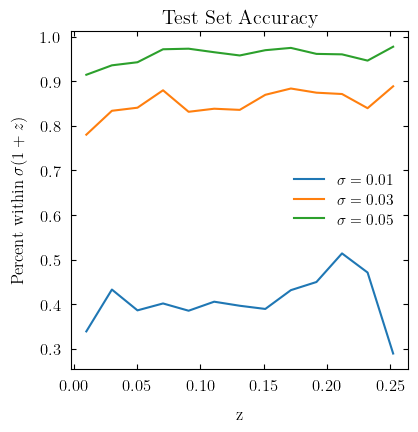

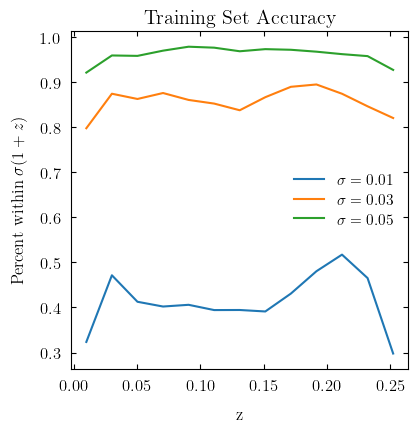

In [420]:
### Make plots of training and testing set accuracy 
accs1 = []
accs2 = []
accs3 = []
uplim = 1
lolim = 0.01
zrange = np.linspace(lolim, uplim, num=50)
for zl in zrange:
    acc_test = accuracy(model_1, X_test, y_test, .01, zlim=[zl,zl+((uplim-lolim)/50)])
    accs1.append(acc_test)
    acc_test = accuracy(model_1, X_test, y_test, .03, zlim=[zl,zl+((uplim-lolim)/50)])
    accs2.append(acc_test)
    acc_test = accuracy(model_1, X_test, y_test, .05, zlim=[zl,zl+((uplim-lolim)/50)])
    accs3.append(acc_test)
    
plt.figure()
plt.plot(zrange,accs1,label=r'$\sigma = 0.01$')
plt.plot(zrange,accs2,label=r'$\sigma = 0.03$')
plt.plot(zrange,accs3,label=r'$\sigma = 0.05$')
plt.xlabel('z')
plt.ylabel(r'Percent within $\sigma(1+z)$')
plt.title('Test Set Accuracy')
plt.legend()

accs1 = []
accs2 = []
accs3 = []
zrange = np.linspace(lolim, uplim, num=50)
for zl in zrange:
    acc_test = accuracy(model_1, X_train, y_train, .01, zlim=[zl,zl+((uplim-lolim)/50)])
    accs1.append(acc_test)
    acc_test = accuracy(model_1, X_train, y_train, .03, zlim=[zl,zl+((uplim-lolim)/50)])
    accs2.append(acc_test)
    acc_test = accuracy(model_1, X_train, y_train, .05, zlim=[zl,zl+((uplim-lolim)/50)])
    accs3.append(acc_test)

plt.figure()
plt.plot(zrange,accs1,label=r'$\sigma = 0.01$')
plt.plot(zrange,accs2,label=r'$\sigma = 0.03$')
plt.plot(zrange,accs3,label=r'$\sigma = 0.05$')
plt.xlabel('z')
plt.ylabel(r'Percent within $\sigma(1+z)$')
plt.title('Training Set Accuracy')
plt.legend()

plt.show()


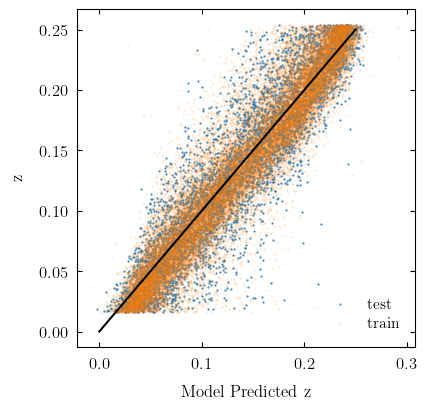

In [421]:
### Plot predicted z vs z
plt.figure()
d = 1
plt.plot(y_preds_test/d,y_test/d,'.',label='test',markersize=1)
plt.plot(y_preds_train/d,y_train/d,'.',label='train',markersize=1,alpha=0.2)
plt.plot([0,.25],[0,.25],'k')
plt.xlabel('Model Predicted z')
plt.ylabel('z')
#plt.title('Test Set Results')
plt.legend()
plt.show()